Trials per condition:
viewing
peripheral    768
central       768
full          768
Name: count, dtype: int64 

Accuracy range:
0 to 1


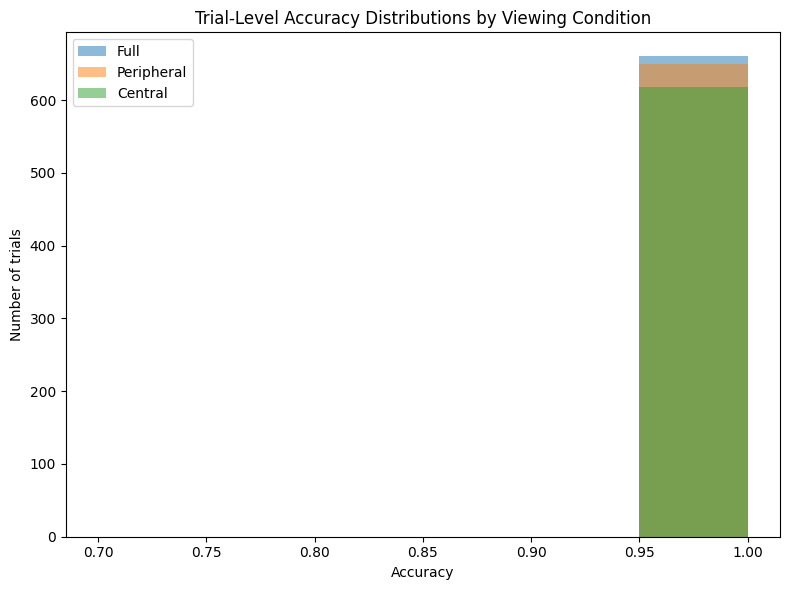

In [ ]:
# Load data + plot histograms

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(
    "data files/trialdata_testing_seconddisplayonly.tsv",
    sep="\t",
    encoding="utf-16"
)

# Keep only relevant columns
df = df[["ACC", "viewing"]].dropna()


# Sanity checks 
print("Trials per condition:")
print(df["viewing"].value_counts(), "\n")

print("Accuracy range:")
print(df["ACC"].min(), "to", df["ACC"].max())

# Define accuracy bins
bins = np.arange(0.7, 1.01, 0.05)

# Extract accuracy per condition
acc_full = df.loc[df["viewing"] == "full", "ACC"]
acc_peripheral = df.loc[df["viewing"] == "peripheral", "ACC"]
acc_central = df.loc[df["viewing"] == "central", "ACC"]

# Plot overlaid histograms
plt.figure(figsize=(8, 6))

plt.hist(acc_full, bins=bins, alpha=0.5, label="Full")
plt.hist(acc_peripheral, bins=bins, alpha=0.5, label="Peripheral")
plt.hist(acc_central, bins=bins, alpha=0.5, label="Central")

plt.xlabel("Accuracy")
plt.ylabel("Number of trials")
plt.title("Trial-Level Accuracy Distributions by Viewing Condition")
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
df["ACC"].describe()


count    2304.000000
mean        0.836372
std         0.370018
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: ACC, dtype: float64

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(
    "data files/trialdata_testing_seconddisplayonly.tsv",
    sep="\t",
    encoding="utf-16"
)

# Keep only necessary columns
df = df[
    ["RECORDING_SESSION_LABEL", "Trial_Index_", "viewing", "ACC"]
].dropna()


In [7]:
participant_acc = (
    df
    .groupby(["RECORDING_SESSION_LABEL", "viewing"])
    .agg(
        accuracy=("ACC", "mean"),
        n_trials=("ACC", "count")
    )
    .reset_index()
)

print(participant_acc.head())


  RECORDING_SESSION_LABEL     viewing  accuracy  n_trials
0                   BR001     central  0.583333        24
1                   BR001        full  0.708333        24
2                   BR001  peripheral  0.750000        24
3                   BR002     central  0.958333        24
4                   BR002        full  0.958333        24


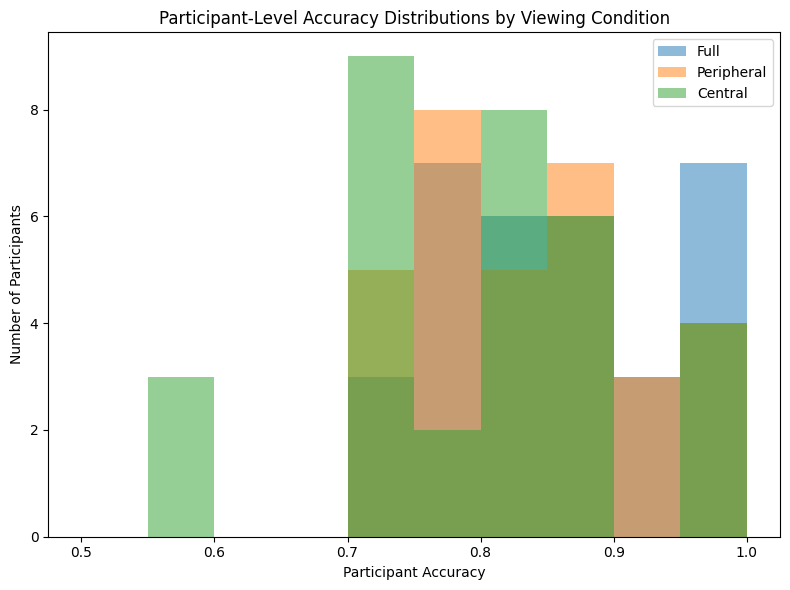

In [8]:
bins = np.arange(0.5, 1.01, 0.05)

plt.figure(figsize=(8, 6))

for cond, label in [("full", "Full"),
                    ("peripheral", "Peripheral"),
                    ("central", "Central")]:
    plt.hist(
        participant_acc[participant_acc["viewing"] == cond]["accuracy"],
        bins=bins,
        alpha=0.5,
        label=label
    )

plt.xlabel("Participant Accuracy")
plt.ylabel("Number of Participants")
plt.title("Participant-Level Accuracy Distributions by Viewing Condition")
plt.legend()

plt.tight_layout()
plt.show()


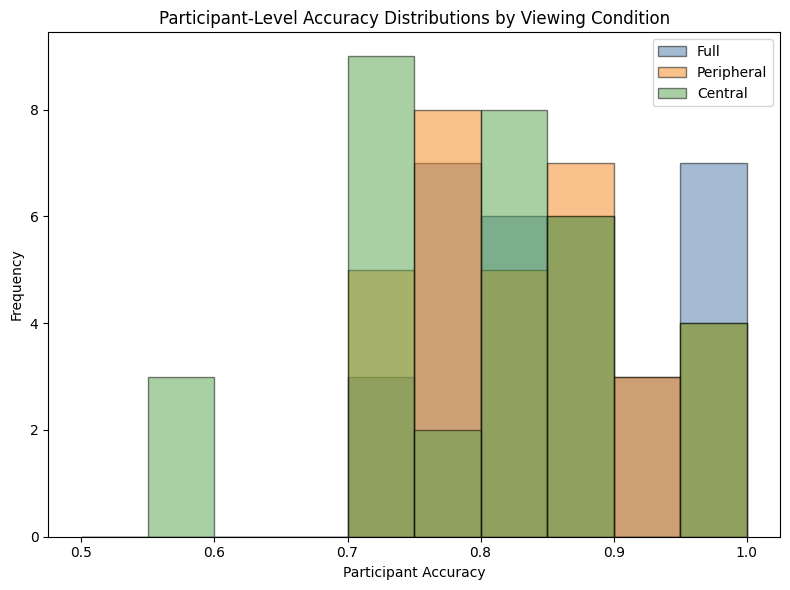

In [21]:
bins = np.arange(0.5, 1.01, 0.05)

colors = {
    "full": "#4C78A8",        # blue
    "peripheral": "#F58518",  # orange
    "central": "#54A24B"      # green
}

plt.figure(figsize=(8, 6))

for cond, label in [("full", "Full"),
                    ("peripheral", "Peripheral"),
                    ("central", "Central")]:
    plt.hist(
        participant_acc[participant_acc["viewing"] == cond]["accuracy"],
        bins=bins,
        alpha=0.5,
        color=colors[cond],
        edgecolor="black",
        label=label
    )

plt.xlabel("Participant Accuracy")
plt.ylabel("Frequency")
plt.title("Participant-Level Accuracy Distributions by Viewing Condition")
plt.legend()

plt.tight_layout()
plt.show()


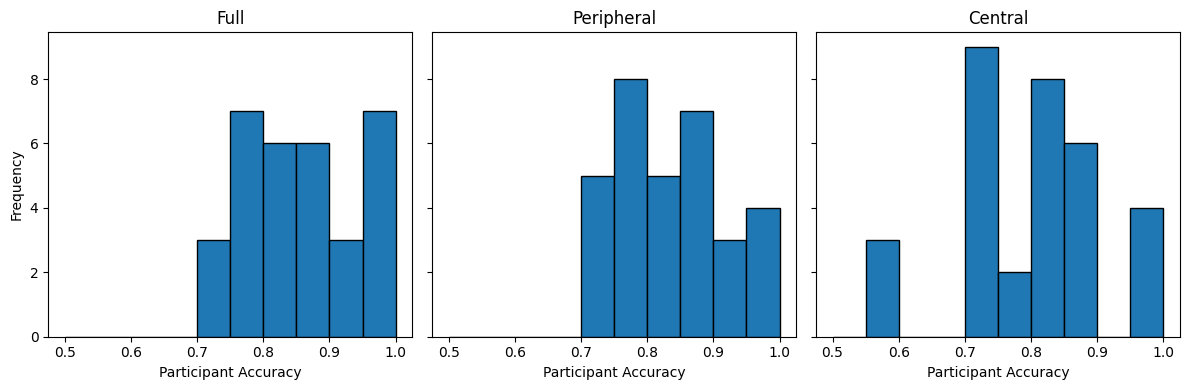

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

bins = np.arange(0.5, 1.01, 0.05)

for ax, cond, title in zip(
    axes,
    ["full", "peripheral", "central"],
    ["Full", "Peripheral", "Central"]
):
    ax.hist(
        participant_acc[participant_acc["viewing"] == cond]["accuracy"],
        bins=bins,
        edgecolor="black"
    )
    ax.set_title(title)
    ax.set_xlabel("Participant Accuracy")

axes[0].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


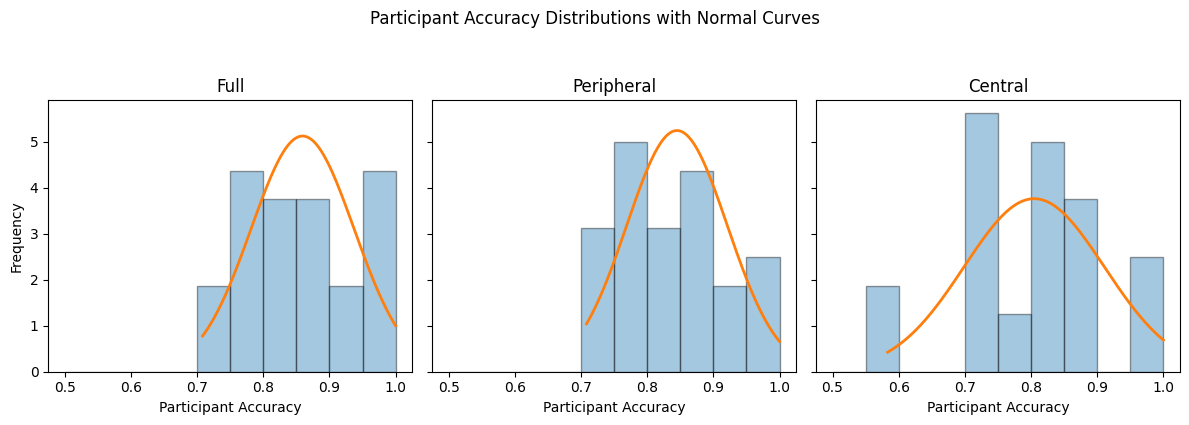

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

bins = np.arange(0.25, 1.01, 0.05)

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

for ax, cond, title in zip(
    axes,
    ["full", "peripheral", "central"],
    ["Full", "Peripheral", "Central"]
):
    data = participant_acc[participant_acc["viewing"] == cond]["accuracy"]

    # Histogram (density so curve matches)
    ax.hist(
        data,
        bins=bins,
        density=True,
        alpha=0.4,
        edgecolor="black"
    )

    # Normal fit
    mu, sigma = norm.fit(data)
    x = np.linspace(data.min(), data.max(), 200)
    y = norm.pdf(x, mu, sigma)

    ax.plot(x, y, linewidth=2)
    ax.set_title(title)
    ax.set_xlabel("Participant Accuracy")

axes[0].set_ylabel("Frequency")

plt.suptitle("Participant Accuracy Distributions with Normal Curves", y=1.05)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load data
df = pd.read_csv(
    "data files/trialdata_testing_seconddisplayonly.tsv",
    sep="\t",
    encoding="utf-16"
)

df = df[
    ["RECORDING_SESSION_LABEL", "Trial_Index_", "viewing", "ACC"]
].dropna()

# Trial-wise accuracy (ALL 72 trials)
trialwise_acc = (
    df
    .groupby("Trial_Index_")
    .agg(
        trial_accuracy=("ACC", "mean"),
        n_participants=("ACC", "count")
    )
    .reset_index()
)

# Sanity check
print("Number of trials:", trialwise_acc.shape[0])  # should be 72


Number of trials: 72


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load data
df = pd.read_csv(
    "data files/trialdata_testing_seconddisplayonly.tsv",
    sep="\t",
    encoding="utf-16"
)

df = df[
    ["RECORDING_SESSION_LABEL", "Trial_Index_", "viewing", "ACC"]
].dropna()

# Trial-wise accuracy (72 trials)
trialwise_acc = (
    df
    .groupby(["viewing", "Trial_Index_"])
    .agg(trial_accuracy=("ACC", "mean"))
    .reset_index()
)

# Sanity check
print(trialwise_acc.groupby("viewing")["Trial_Index_"].nunique())
# should be 24 per condition, 72 total


viewing
central       72
full          72
peripheral    72
Name: Trial_Index_, dtype: int64


In [5]:
df = df.sort_values(
    ["RECORDING_SESSION_LABEL", "viewing", "Trial_Index_"]
)

df["trial_in_viewing"] = (
    df
    .groupby(["RECORDING_SESSION_LABEL", "viewing"])
    .cumcount() + 1
)


In [6]:
trialwise_acc = (
    df
    .groupby(["viewing", "trial_in_viewing"])
    .agg(
        trial_accuracy=("ACC", "mean"),
        n_participants=("ACC", "count")
    )
    .reset_index()
)


In [7]:
trialwise_acc.groupby("viewing")["trial_in_viewing"].nunique()


viewing
central       24
full          24
peripheral    24
Name: trial_in_viewing, dtype: int64

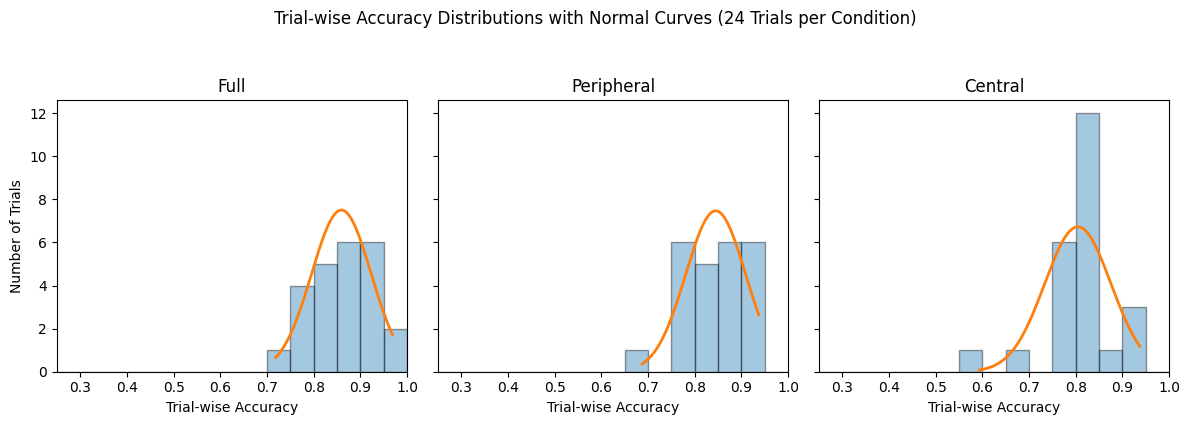

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load data
df = pd.read_csv(
    "data files/trialdata_testing_seconddisplayonly.tsv",
    sep="\t",
    encoding="utf-16"
)

df = df[
    ["RECORDING_SESSION_LABEL", "Trial_Index_", "viewing", "ACC"]
].dropna()

# Create within-viewing trial index (1–24)
df = df.sort_values(
    ["RECORDING_SESSION_LABEL", "viewing", "Trial_Index_"]
)

df["trial_in_viewing"] = (
    df
    .groupby(["RECORDING_SESSION_LABEL", "viewing"])
    .cumcount() + 1
)

# Trial-wise accuracy (24 per condition)
trialwise_acc = (
    df
    .groupby(["viewing", "trial_in_viewing"])
    .agg(trial_accuracy=("ACC", "mean"))
    .reset_index()
)

# Plot settings
bins = np.arange(0.25, 1.01, 0.05)
bin_width = bins[1] - bins[0]

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

for ax, cond, title in zip(
    axes,
    ["full", "peripheral", "central"],
    ["Full", "Peripheral", "Central"]
):
    data = trialwise_acc[
        trialwise_acc["viewing"] == cond
    ]["trial_accuracy"]

    # Histogram as COUNTS (default blue)
    ax.hist(
        data,
        bins=bins,
        density=False,
        alpha=0.4,
        edgecolor="black"
    )

    # Normal curve (default orange, scaled to counts)
    mu, sigma = norm.fit(data)
    x = np.linspace(data.min(), data.max(), 300)
    y = norm.pdf(x, mu, sigma)
    y_scaled = y * len(data) * bin_width

    ax.plot(x, y_scaled, linewidth=2)

    ax.set_title(title)
    ax.set_xlabel("Trial-wise Accuracy")
    ax.set_xlim(0.25, 1.0)

axes[0].set_ylabel("Number of Trials")

plt.suptitle(
    "Trial-wise Accuracy Distributions with Normal Curves (24 Trials per Condition)",
    y=1.05
)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Load data
df = pd.read_csv(
    "data files/trialdata_testing_seconddisplayonly.tsv",
    sep="\t",
    encoding="utf-16"
)

# Print all column names to see what's available
print("Available columns:")
print(df.columns.tolist())
print("\n")

# Print first few rows to see the data
print("First few rows:")
print(df.head())

Available columns:
['RECORDING_SESSION_LABEL', 'INDEX', 'AVERAGE_BLINK_DURATION', 'AVERAGE_FIXATION_DURATION', 'AVERAGE_SACCADE_AMPLITUDE', 'AVERAGE_X_RESOLUTION', 'AVERAGE_Y_RESOLUTION', 'BLINK_COUNT', 'DATA_FILE', 'EYE_REPORTED', 'EYE_TRACKED', 'FIXATION_COUNT', 'FIXATION_DURATION_MAX', 'FIXATION_DURATION_MAX_TIME', 'FIXATION_DURATION_MIN', 'FIXATION_DURATION_MIN_TIME', 'MEDIAN_FIXATION_DURATION', 'MEDIAN_SACCADE_AMPLITUDE', 'PUPIL_SIZE_MAX', 'PUPIL_SIZE_MAX_TIME', 'PUPIL_SIZE_MAX_X', 'PUPIL_SIZE_MAX_Y', 'PUPIL_SIZE_MEAN', 'PUPIL_SIZE_MIN', 'PUPIL_SIZE_MIN_TIME', 'PUPIL_SIZE_MIN_X', 'PUPIL_SIZE_MIN_Y', 'REACTION_TIME', 'SAMPLING_RATE', 'SD_FIXATION_DURATION', 'SD_SACCADE_AMPLITUDE', 'ACC', 'RESPONSE', 'Session_Name_', 'Trial_Index_', 'birdname1', 'birdname2', 'correct_response', 'filename1', 'filename2', 'filename2_bg', 'filename2_fg', 'same_different', 'split', 'viewing']


First few rows:
  RECORDING_SESSION_LABEL  INDEX AVERAGE_BLINK_DURATION  \
0                   BR035      1   

In [24]:
import os

# Check current working directory
print("Current directory:", os.getcwd())
print("\n")

# List what's in current directory
print("Contents of current directory:")
for item in os.listdir("."):
    print(f"  {item}")
print("\n")

# Check if THREE_JSON_OUTPUT exists at root
if os.path.exists("THREE_JSON_OUTPUT"):
    print("THREE_JSON_OUTPUT exists!")
    if os.path.exists("THREE_JSON_OUTPUT/Testing"):
        print("Testing folder exists!")
        print("Files in Testing:")
        for item in os.listdir("THREE_JSON_OUTPUT/Testing"):
            print(f"  {item}")

Current directory: /Users/daisybuathatseephol/Documents/three_json_output


Contents of current directory:
  right_wrong.ipynb
  Training 2
  .DS_Store
  figure_a
  newfigurea.ipynb
  ekef.ipynb
  figureb.ipynb
  pair_mapping_from_tsv.csv
  top_bottom_3_pairs_per_viewing.csv
  figurea.ipynb
  not used anymore
  Testing
  fdm_outputs_correctness
  Training 1
  figure_b
  fdm_generation.ipynb
  fdm_outputs
  .git
  top_bottom_3_pairs.csv
  kde_outputs
  data files


